# **Trabajo final - Aprenizaje de máquinas**

## Multiclass classification of dry beans using machine learning techniques

Equipo #4:
* Gladis Carmona Pedraza CC **43983972**
* Camila Arbeláez Vélez CC **1036959719**
* Juan Pablo Botero Aguirre CC **98714459**

# 1. Descripción del conjunto de datos

Este conjunto de datos cuenta con 13,611 instancias y 17 atributos de siete tipos diferentes de frijoles secos, tomando en cuenta las características de dimensión y estructura (12  atributos de dimensiones, 4 atributos de forma de los granos y 1 de clase).


Información de los atributos:
* 1. **Área (A):** el área de una zona de fríjoles y el número de pixeles dentro de sus límites.
* 2. **Perímetro (P):** La circunferencia del frijol se define como la longitud de su borde.
* 3. **Longitud del eje mayor (L):** la distancia entre los extremos de la línea más larga que se puede dibujar de un frijol.
* 4. **Longitud del eje menor (l):** la línea más larga que se puede trazar desde el frijol estando perpendicular al eje principal.
* 5. **Relación de aspecto (K):** define la relación entre L y l.
* 6. **Excentricidad (Ec):** Excentricidad de la elipse que tiene los mismos momentos que la región.
* 7. **Área convexa (C):** número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.
* 8. **Diámetro equivalente (Ed):** El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.
* 9. **Extensión (Ex):** la relación entre los píxeles del cuadro delimitador y el área del frijol.
* 10. **Solidez (S):** También conocida como convexidad. La relación entre los píxeles de la cáscara convexa y los que se encuentran en los frijoles.
* 11. **Redondez (R):** Calculado con la siguiente fórmula: (4piA)/(P^2)
* 12. **Compacidad (CO):** mide la redondez de un objeto: Ed/L
* 13. **ShapeFactor1 (SF1)**
* 14. **ShapeFactor2 (SF2)**
* 15. **ShapeFactor3 (SF3)**
* 16. **ShapeFactor4 (SF4)**
* 17. **Clase** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz y Sira)

Las clases de granos se muestra a continuación:

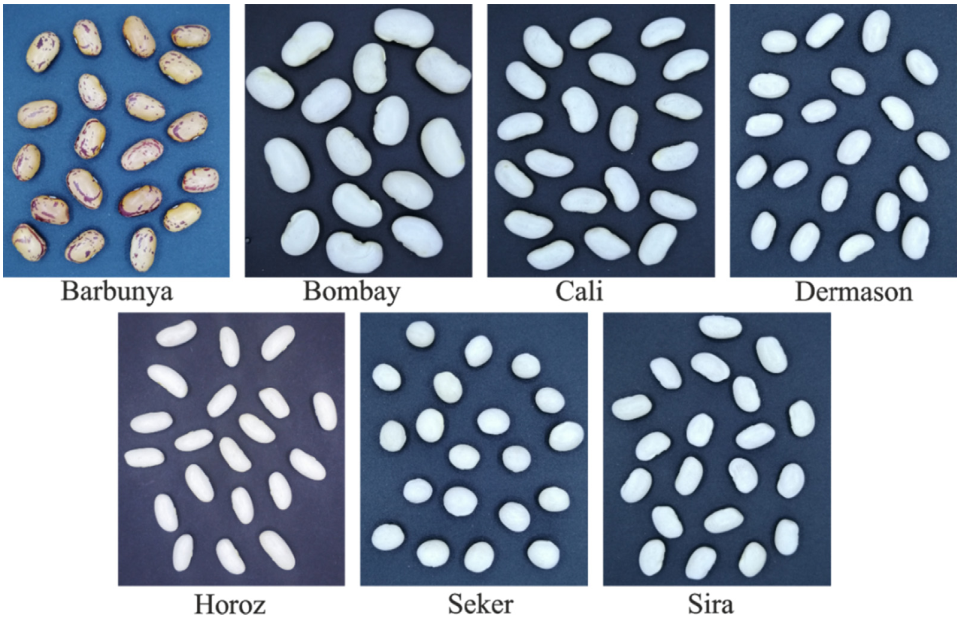

**Referencias:**

KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Dataset disponible en:
https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

# 2. Objetivo:
Clasificar los granos en una de las siete clases utilizando técnicas de aprendizaje auntomático

# 3. Análisis exploratorio de los datos

In [6]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from time import time
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar el conjunto de datos
df = pd.read_excel('/Users/JP/Documents/GitHub/Aprendizaje_maquinas/Trabajo_final_ML/DryBeanDataset/Dry_Bean_Dataset.xlsx')
# Verificar la carga
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
# Dimensiones del conjunto de datos:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 17 columnas


In [4]:
# Descripción de los atributos, NaN y tipo de datos:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

El datase no contiene datos nulos. Area y ConvexArea son números enteros y las demás variables son decimales, excepto Class que es una cadena de texto (clase de grano).

## 3.1 Análisis univariado

In [5]:
# Descripción de las variables cuantitativas
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

### Codificación de la clase de grano y adición al dataset

In [3]:
df['Class_number'] = [1 if x == 'SEKER' else 
                      2 if x == 'BARBUNYA' else
                      3 if x == 'BOMBAY' else
                      4 if x == 'CALI' else
                      5 if x == 'DERMASON' else
                      6 if x == 'HOROZ' else
                      7 for x in df['Class']]

In [4]:
print("El dataset contiene {} filas y {} columnas".format(df.shape[0], df.shape[1]))

El dataset contiene 13611 filas y 18 columnas


### Conteo de la variable cualitativa (Clase)

<IPython.core.display.Javascript object>


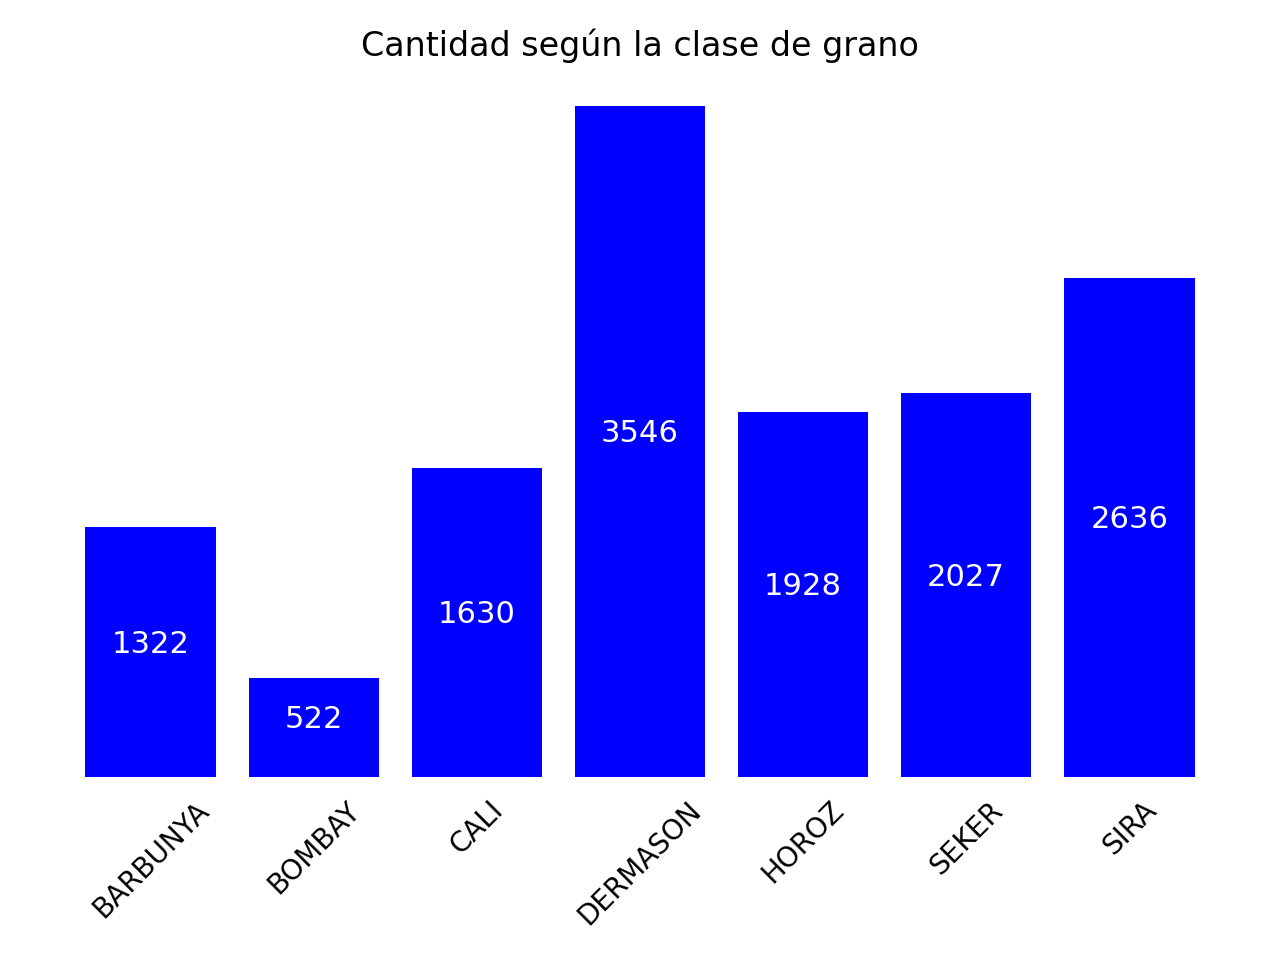

In [322]:
x_bar = ['BARBUNYA', 'BOMBAY', 'CALI',
    'DERMASON','HOROZ','SEKER',
    'SIRA']
y_bar = df.groupby('Class')['Class'].count()
bars = plt.bar(x_bar, y_bar, align='center', linewidth=0, color='blue')
plt.title('Cantidad según la clase de grano');

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2 , bar.get_height()/2 - 5, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)

plt.tight_layout();

Se observa la distribución de los granos de cada clase. El tipo de grano con menor frecuencia es Bombay, sin embargo se explorarán y evaluarán diferentes modelos de aprendizaje automático con el fin de comprobar si este hecho se considera un desbalanceo de clases y si es necesario utilizar estrategias para el manejo de datos desbalanceados (ajuste de parámetros del modelo, modificar el conjunto de datos, muestras artificiales o ensamble de modelos con balanceo).

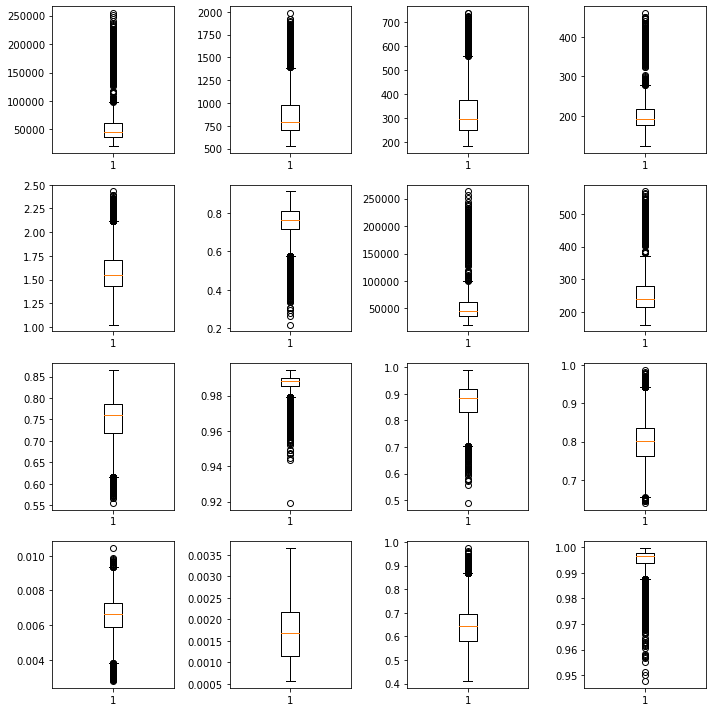

In [9]:
# Gráfico de cajas y bigotes con outliers

fig, ax = plt.subplots(4,4, figsize=(10,10))

ax[0,0].boxplot(df.Area)
ax[0,1].boxplot(df.Perimeter)
ax[0,2].boxplot(df.MajorAxisLength)
ax[0,3].boxplot(df.MinorAxisLength)
ax[1,0].boxplot(df.AspectRation)
ax[1,1].boxplot(df.Eccentricity)
ax[1,2].boxplot(df.ConvexArea)
ax[1,3].boxplot(df.EquivDiameter)
ax[2,0].boxplot(df.Extent)
ax[2,1].boxplot(df.Solidity)
ax[2,2].boxplot(df.roundness)
ax[2,3].boxplot(df.Compactness)
ax[3,0].boxplot(df.ShapeFactor1)
ax[3,1].boxplot(df.ShapeFactor2)
ax[3,2].boxplot(df.ShapeFactor3)
ax[3,3].boxplot(df.ShapeFactor4)

plt.tight_layout()
plt.show();

Como se evidencian outliers en la mayoría de las variables, se grafica a continuación sin outliers

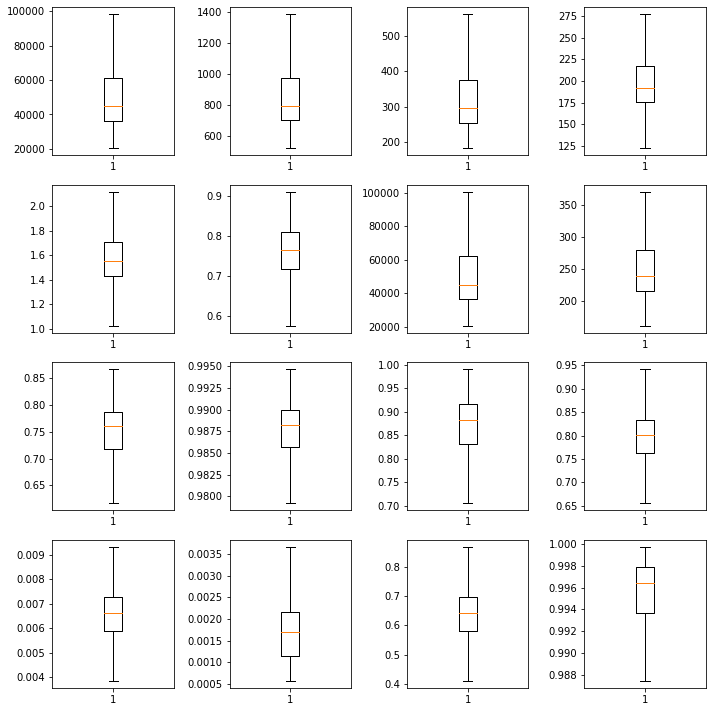

In [10]:
# Gráfico de cajas y bigotes sin outliers

fig, ax = plt.subplots(4,4, figsize=(10,10))

ax[0,0].boxplot(df.Area, sym='')
ax[0,1].boxplot(df.Perimeter, sym='')
ax[0,2].boxplot(df.MajorAxisLength, sym='')
ax[0,3].boxplot(df.MinorAxisLength, sym='')
ax[1,0].boxplot(df.AspectRation, sym='')
ax[1,1].boxplot(df.Eccentricity, sym='')
ax[1,2].boxplot(df.ConvexArea, sym='')
ax[1,3].boxplot(df.EquivDiameter, sym='')
ax[2,0].boxplot(df.Extent, sym='')
ax[2,1].boxplot(df.Solidity, sym='')
ax[2,2].boxplot(df.roundness, sym='')
ax[2,3].boxplot(df.Compactness, sym='')
ax[3,0].boxplot(df.ShapeFactor1, sym='')
ax[3,1].boxplot(df.ShapeFactor2, sym='')
ax[3,2].boxplot(df.ShapeFactor3, sym='')
ax[3,3].boxplot(df.ShapeFactor4, sym='')

plt.tight_layout()
plt.show();

Se observa que las variables tienen diferentes escalas, por ejemplo Area tiene escala entre 20000 y 100000 y ShapeFactor2 entre 0.0005 y 0.0035. Es necesario escalar los datos para evitar que dominen las variables con escalas más grandes.

## Normalización de datos

In [52]:
X = df[df.columns[:-2]]
y = df['Class_number']
X_normalized = StandardScaler().fit(X).transform(X)  
X_train_normalized = StandardScaler().fit(X_train).transform(X_train)
X_test_normalized = StandardScaler().fit(X_test).transform(X_test)

# 3.2 Análisis bivariado

##  Matriz de dispersión

<IPython.core.display.Javascript object>


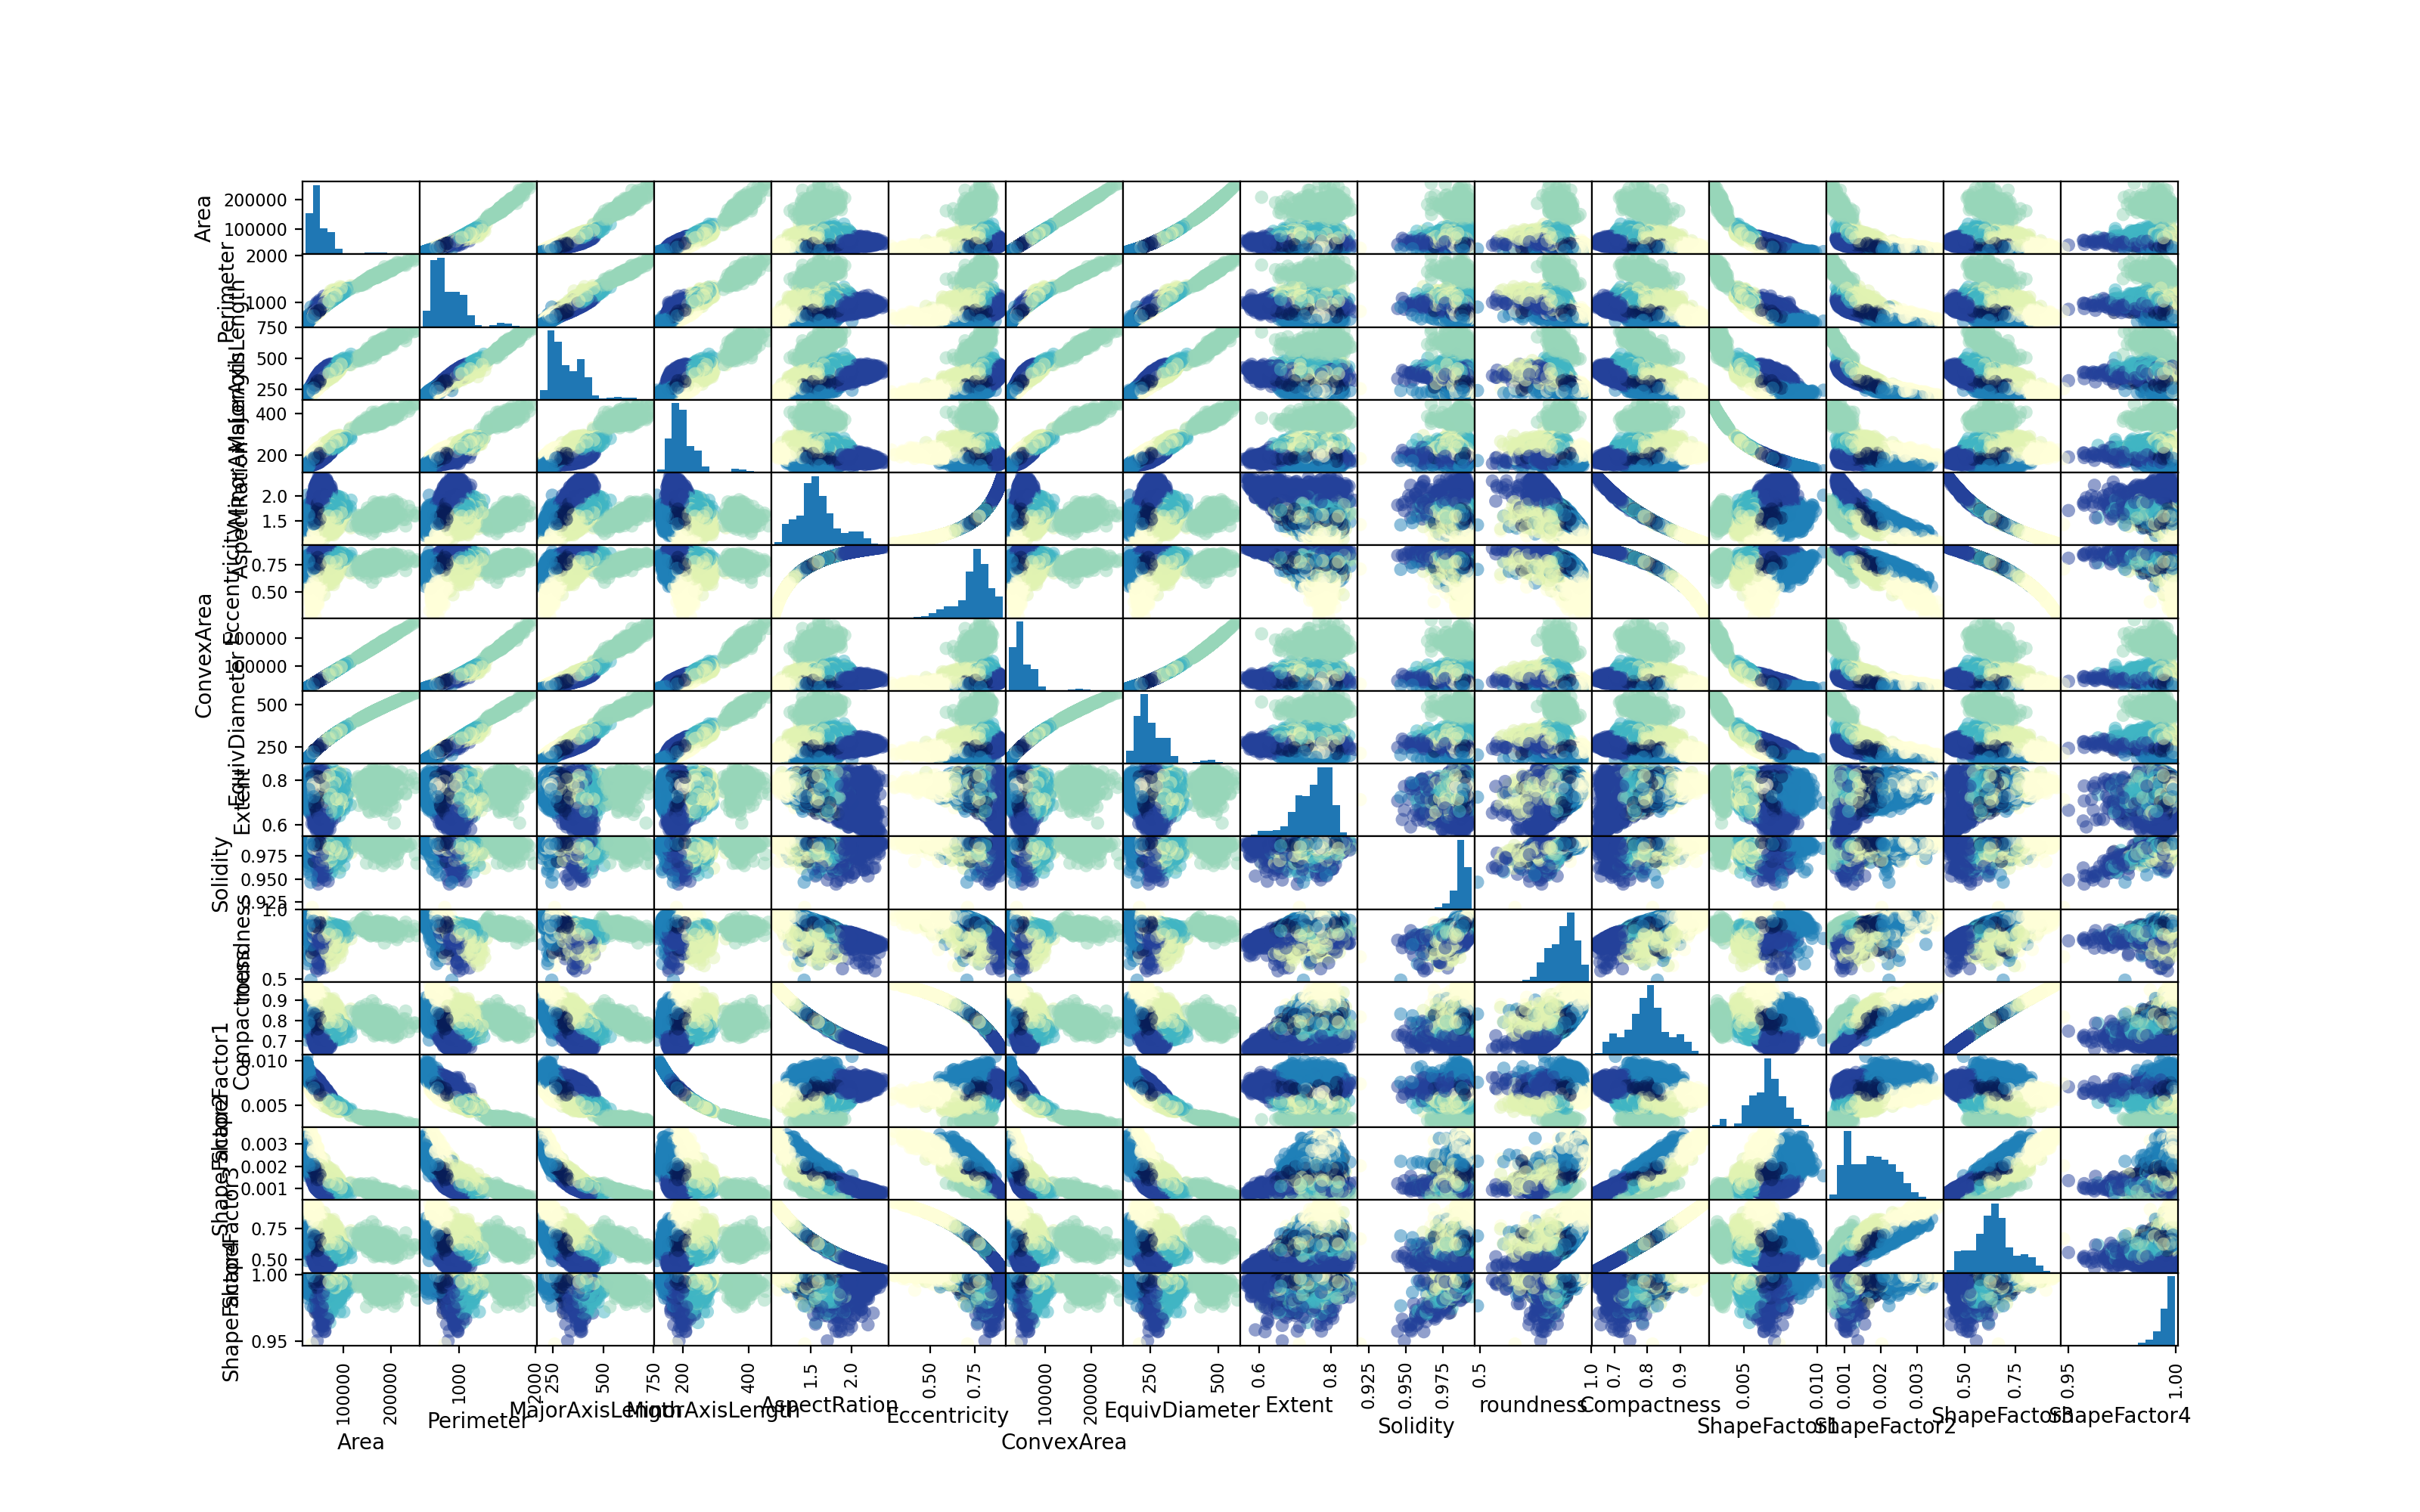

In [251]:
%matplotlib notebook

from matplotlib import cm
from pandas.plotting import scatter_matrix

X = df[df.columns[:-2]]
y = df['Class_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('YlGnBu')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(16,10), cmap=cmap)

La matriz de dispersión evidencia algunas instancias con alta corelación, tanto positiva como negativa. Debido al número de instancias, no es fácil de visualizar y se complementa con una matriz de correlación y un gráfico heatmap.

## Matriz de correlación heatmap

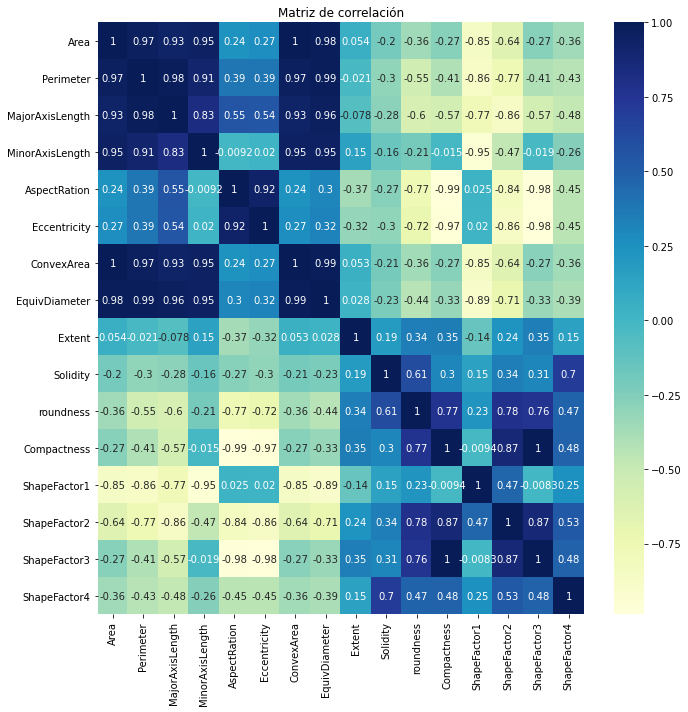

In [10]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(X.corr(), annot=True, cmap="YlGnBu");
plt.title("Matriz de correlación")
plt.tight_layout()

Se observa que Area, Perimeter, MajorAxisLength y MinorAxisLength presentan correlación positiva entre ellas (mayor de 0.95) y estas 4 variables también presentan correlación con ConvexArea y EquivDiameter (mayor 0.95).

ShapeFactor1 tiene alta correlación negativa con Area, Perimeter, MinorAxisLength, ConvexArea y EquivDiameter (mayor de 0.85).

AspectRation y Excentrivity tienen alta correlación negativa con Compactness con ShapeFactor2 y ShapeFactor2 (mayor de 0.84).

## Scatter plot en 3D de variables seleccionadas

<IPython.core.display.Javascript object>


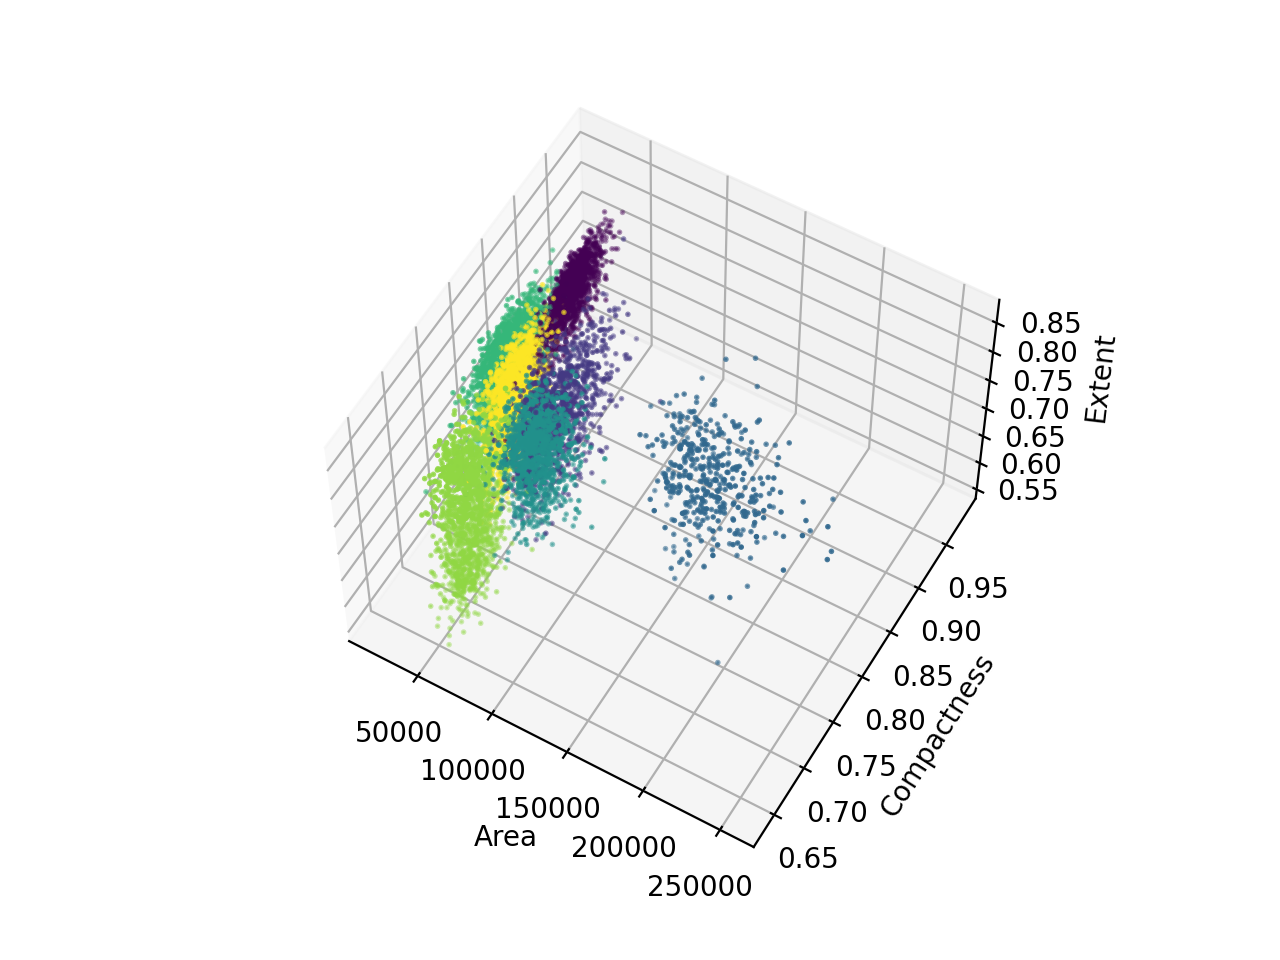

In [326]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Area'], X_train['Compactness'], X_train['Extent'], c = y_train, marker = 'o', s=1)
ax.set_xlabel('Area')
ax.set_ylabel('Compactness')
ax.set_zlabel('Extent')
plt.show()

Se observan las siete clases de granos presentes en el dataset y pueden ser separadas por técnicas de aprendizaje automático

# 4. Clasificadores de machine learning

## Selección de las instancias y de la clase para clasificación

In [8]:
X = df[df.columns[:-2]]
y = df['Class_number']
# Partición 75% / 25% train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Clasificador Dummy como línea de base

In [11]:
from sklearn.dummy import DummyClassifier

dummy_stra = DummyClassifier(strategy = 'stratified').fit(X_train_normalized, y_train)
y_dummy_predictions = dummy_stra.predict(X_test_normalized)
acc_dummy = dummy_stra.score(X_test_normalized, y_test)
print("La exactitud del modelo dummy es: {:.4f}".format(acc_dummy))

La exactitud del modelo dummy es: 0.1751


In [329]:
plot_confusion_matrix(dummy_stra,
                      X_test,
                      y_test,
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical');
plt.title("Matriz de confusión del clasificador dummy")
plt.tight_layout()

<IPython.core.display.Javascript object>

## 4.1 Clasificador usando Decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
start_time = time()
decision_tree = DecisionTreeClassifier(
criterion='gini', splitter='best').fit(X_train_normalized, y_train)
elapsed_time = time() - start_time
print('La exactitud del modelo en el conjunto de entrenamiento es: {:.4f}'
     .format(decision_tree.score(X_train_normalized, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.4f}'
     .format(decision_tree.score(X_test_normalized, y_test)))
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

La exactitud del modelo en el conjunto de entrenamiento es: 1.0000
La exactitud del modelo en el conjunto de prueba es: 0.8980
Tiempo de ejecución: 0.3350 segundos.


La exactitud de 100% en el conjunto de entrenamiento evidencia un sobrejuste del modelo; para evitar esto se deben modificar los parámetros del modelo. A continuacuión se modificadrá el max_depth del árbol y se mantienen los parámetros criterion = 'gini'y splitter = 'best'.

In [14]:
# Setting max decision tree depth to help avoid overfitting
start_time = time()
decision_tree2 = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth = 4).fit(X_train_normalized, y_train)
elapsed_time = time() - start_time
print('La exactitud del modelo en el conjunto de entrenamiento es: {:.4f}'
     .format(decision_tree2.score(X_train_normalized, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.4f}'
     .format(decision_tree2.score(X_test_normalized, y_test)))
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

La exactitud del modelo en el conjunto de entrenamiento es: 0.8254
La exactitud del modelo en el conjunto de prueba es: 0.8254
Tiempo de ejecución: 0.1941 segundos.


### Visualización del Decision tree

In [33]:
import graphviz
from sklearn import tree

In [334]:
dot_data = tree.export_graphviz(decision_tree2, out_file=None, 
                                feature_names=df.columns[:-2],
                                class_names=df['Class'].unique(),
                                filled=True)

In [338]:
graph = graphviz.Source(dot_data, format="png")

In [336]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

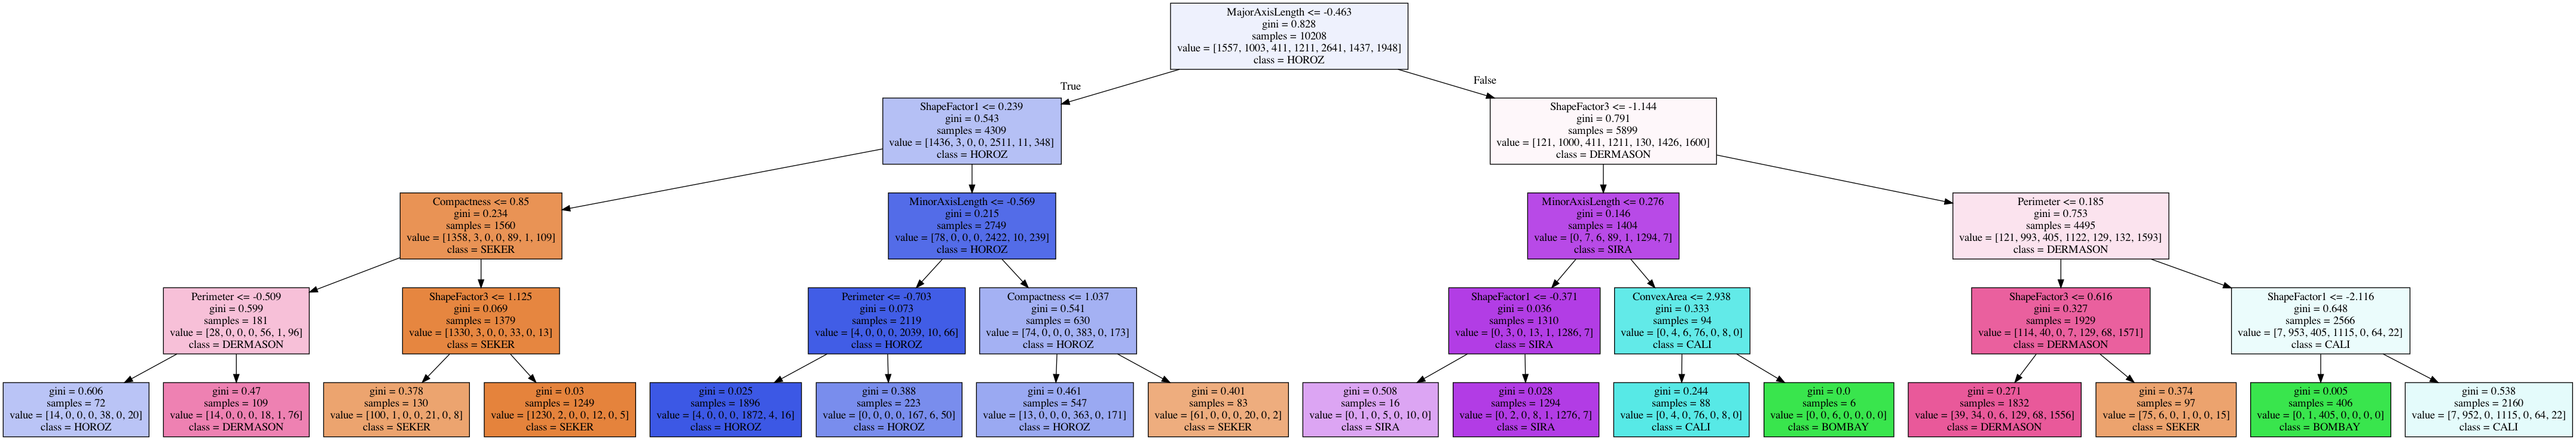

### Evaluación del clasificador Decision tree

In [34]:
from sklearn.metrics import plot_confusion_matrix

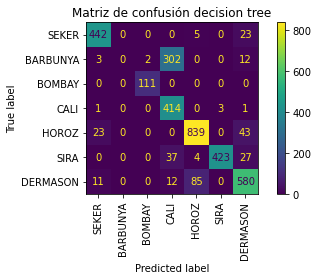

In [36]:
plot_confusion_matrix(decision_tree2,
                      X_test_normalized,
                      y_test, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical');
plt.title("Matriz de confusión decision tree")
plt.tight_layout()

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [341]:
tree_predicted = decision_tree2.predict(X_test_normalized)

In [342]:
print(classification_report(y_test, tree_predicted))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       470
           2       0.00      0.00      0.00       319
           3       0.98      1.00      0.99       111
           4       0.54      0.99      0.70       419
           5       0.90      0.93      0.91       905
           6       0.99      0.86      0.92       491
           7       0.85      0.84      0.84       688

    accuracy                           0.83      3403
   macro avg       0.74      0.79      0.76      3403
weighted avg       0.78      0.83      0.79      3403



La precisión global del modelo es 83%, sin embargo, la clase 2 (Barbunya) no se predijo correctamente ya que el modelo la predijo como clase 4 (Cali). Debido al resultado de precision y recall igual a cero, el modelo no se considera adecuado y se exporarán otras técnicas.

## 4.2 Clasificador usando Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

start_time = time()
random_forest.fit(X_train_normalized, y_train)
elapsed_time = time() - start_time
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Tiempo de ejecución: 5.8176 segundos.


In [17]:
from sklearn.metrics import accuracy_score
y_predict_rf = random_forest.predict(X_test_normalized)
acc_score_rf = accuracy_score(y_test, y_predict_rf)
print('La exactitud del random forest es: {:.4f}'.format(acc_score_rf))

La exactitud del random forest es: 0.9245


### Evaluación del clasificador Random forest

In [346]:
plot_confusion_matrix(random_forest,
                      X_test_normalized,
                      y_test, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del random forest")
plt.tight_layout();

<IPython.core.display.Javascript object>

In [18]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           1       0.93      0.96      0.94       470
           2       0.94      0.93      0.93       319
           3       1.00      1.00      1.00       111
           4       0.92      0.94      0.93       419
           5       0.92      0.93      0.92       905
           6       0.97      0.93      0.95       491
           7       0.88      0.86      0.87       688

    accuracy                           0.92      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.92      0.92      0.92      3403



La precisión global del modelo es 93%, para todas las clases se obtuvieron las métricas de precisión y recall mayores de 0.9, excepto para la clase 7 que fueron 88% y 86%, respectivamente, sin embargo, se consideran aceptables.

## 4.3 Clasificador usando K-Nearest-Neighbor

### Precisión del clasificador kNN según el parámetro k

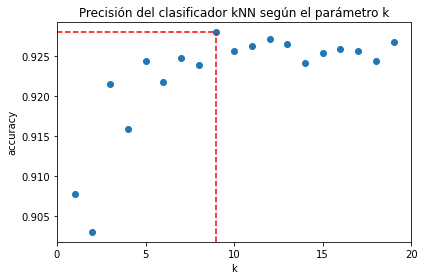

In [19]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,20)
scores = []

for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train_normalized, y_train)
    scores.append(knn1.score(X_test_normalized, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.axhline(y=scores[8], xmin=0, xmax=0.45, c='r', ls='--')
plt.axvline(x=9, ymin=0, ymax=0.95, c='r', ls='--')
plt.title("Precisión del clasificador kNN según el parámetro k")
plt.xticks([0,5,10,15,20])
plt.tight_layout();

In [20]:
knn2 = KNeighborsClassifier(n_neighbors = 9)
start_time = time()
knn2.fit(X_train_normalized, y_train)
elapsed_time = time() - start_time
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Tiempo de ejecución: 0.0320 segundos.


### Evaluación del clasificador kNN

In [21]:
acc_score_knn = knn2.score(X_test_normalized, y_test)
print('La exactitud del kNN es: {:.4f}'.format(acc_score_knn))

La exactitud del kNN es: 0.9280


In [22]:
y_pred_knn = knn2.predict(X_test_normalized)

In [23]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       470
           2       0.96      0.90      0.93       319
           3       1.00      1.00      1.00       111
           4       0.92      0.96      0.94       419
           5       0.92      0.92      0.92       905
           6       0.97      0.95      0.96       491
           7       0.88      0.88      0.88       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [360]:
plot_confusion_matrix(knn2,
                      X_test_normalized,
                      y_test,
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del kNN")
plt.tight_layout();

<IPython.core.display.Javascript object>

Para el modelo de kNN se eligió el parámetro k = 9 debido a que en el gráfico de precisión del clasificador kNN según el parámetro k fue el que obtuvo la mayor exactitud. 

La precisión global del modelo es 93%, para todas las clases se obtuvieron las métricas de precisión y recall mayores de 0.9, excepto para la clase 7 que fueron 88% y 88%, respectivamente, sin embargo, se consideran aceptables. Los resultados de este modelo son similares a los del clasificador random forest.

## 4.4 Clasificador usando Support Vector Machines

In [24]:
from sklearn.svm import SVC
start_time = time()
svm_l = SVC(kernel = 'linear').fit(X_train_normalized, y_train)
elapsed_time = time() - start_time

print('Accuracy of SVC on training set: {:.4f}'
     .format(svm_l.score(X_train_normalized, y_train)))
print('Accuracy of  SVC on test set: {:.4f}'
     .format(svm_l.score(X_test_normalized, y_test)))
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Accuracy of SVC on training set: 0.9257
Accuracy of  SVC on test set: 0.9280
Tiempo de ejecución: 0.9234 segundos.


In [362]:
y_pred_smv_l = svm_l.predict(X_test_normalized)

In [363]:
print(classification_report(y_test, y_pred_smv_l))

              precision    recall  f1-score   support

           1       0.94      0.95      0.95       470
           2       0.94      0.92      0.93       319
           3       1.00      1.00      1.00       111
           4       0.93      0.95      0.94       419
           5       0.93      0.93      0.93       905
           6       0.96      0.95      0.95       491
           7       0.88      0.87      0.88       688

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [364]:
plot_confusion_matrix(svm_l,
                      X_test_normalized,
                      y_test,
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del SVM")
plt.tight_layout();

<IPython.core.display.Javascript object>

La precisión global del modelo es 93%, para todas las clases se obtuvieron las métricas de precisión y recall mayores de 0.9, excepto para la clase 7 que fueron 88% y 87%, respectivamente, sin embargo, se consideran aceptables. Los resultados de este modelo son similares a los del clasificador random forest y kNN.

# 5. Reducción de la dimensionalidad

## 5.1 Análisis de componentes principales (PCA)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Gráfico de varianza explicada por número de componentes

<IPython.core.display.Javascript object>


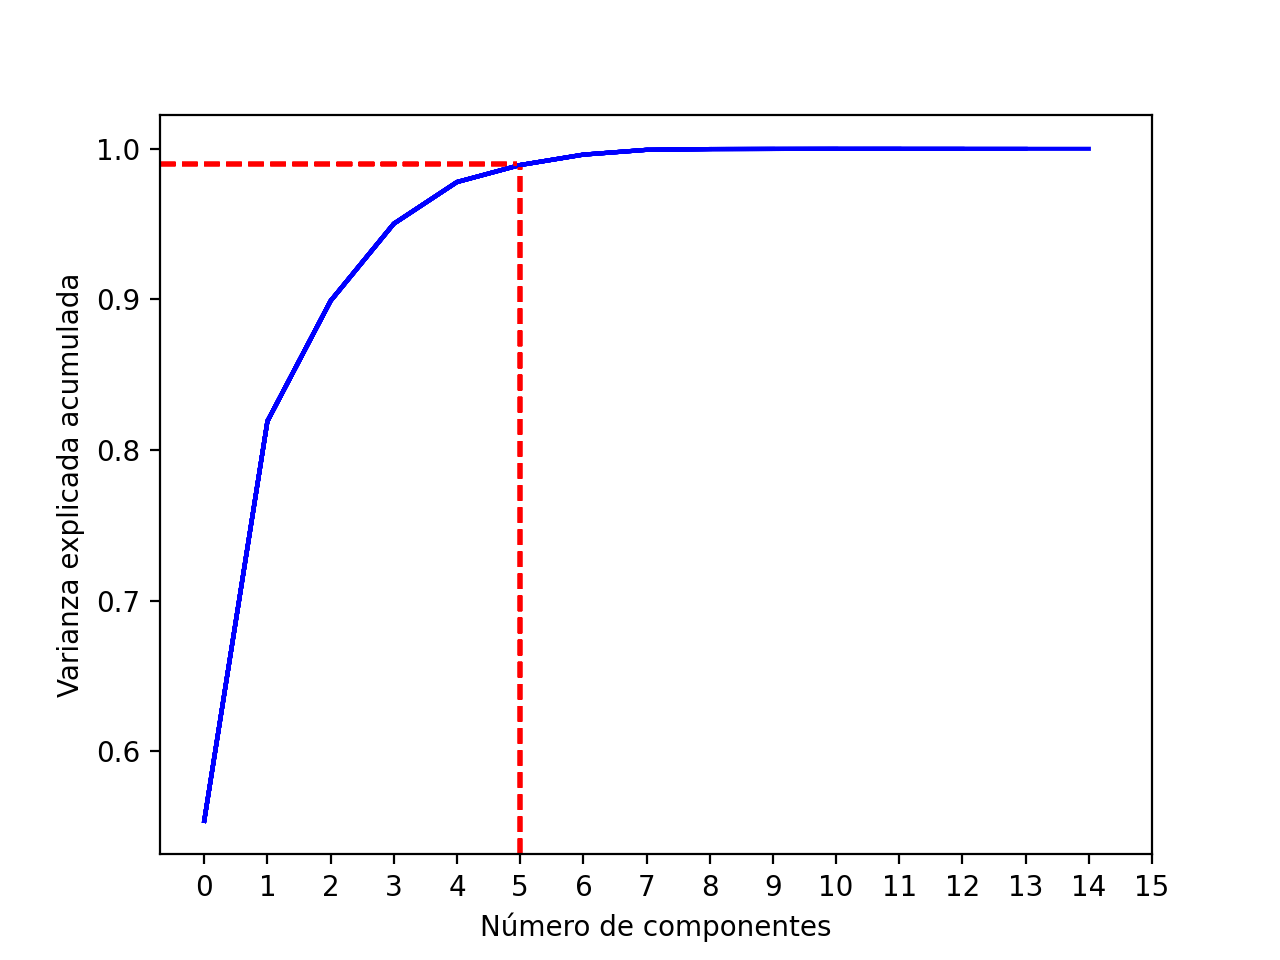

In [371]:
for i in range(X.shape[1]):
    pca = PCA(n_components = i).fit(X_normalized)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color='b')
    plt.xlabel('Número de componentes')
    plt.ylabel('Varianza explicada acumulada')
    plt.gca().set_xticks(np.arange(X.shape[1]))
    plt.axhline(y=0.99, xmin=0, xmax=0.36, c='r', ls='--')
    plt.axvline(x=5, ymin=0, ymax=0.93, c='r', ls='--')

## Varianza explicada

In [372]:
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
print("La varianza explicada de cada componente es:\n {}".format(explained_variance))
print("La varianza acumulada de los componentes es:\n {}".format(cum_explained_variance))

La varianza explicada de cada componente es:
 [5.53784199e-01 2.65289461e-01 7.99410939e-02 5.12312943e-02
 2.76863676e-02 1.12942531e-02 6.90293264e-03 3.18568159e-03
 5.05946127e-04 8.71973932e-05 6.29069607e-05 1.85202803e-05
 9.31472063e-06 6.01059994e-07 1.23921940e-07]
La varianza acumulada de los componentes es:
 [0.5537842  0.81907366 0.89901475 0.95024605 0.97793242 0.98922667
 0.9961296  0.99931528 0.99982123 0.99990843 0.99997133 0.99998985
 0.99999917 0.99999977 0.99999989]


Se escogieron 6 componentes principales debido a que explican el 98.92% de la varianza de los datos. 

### Gráfico de la magnitud de cada variable en las componentes principales

<IPython.core.display.Javascript object>


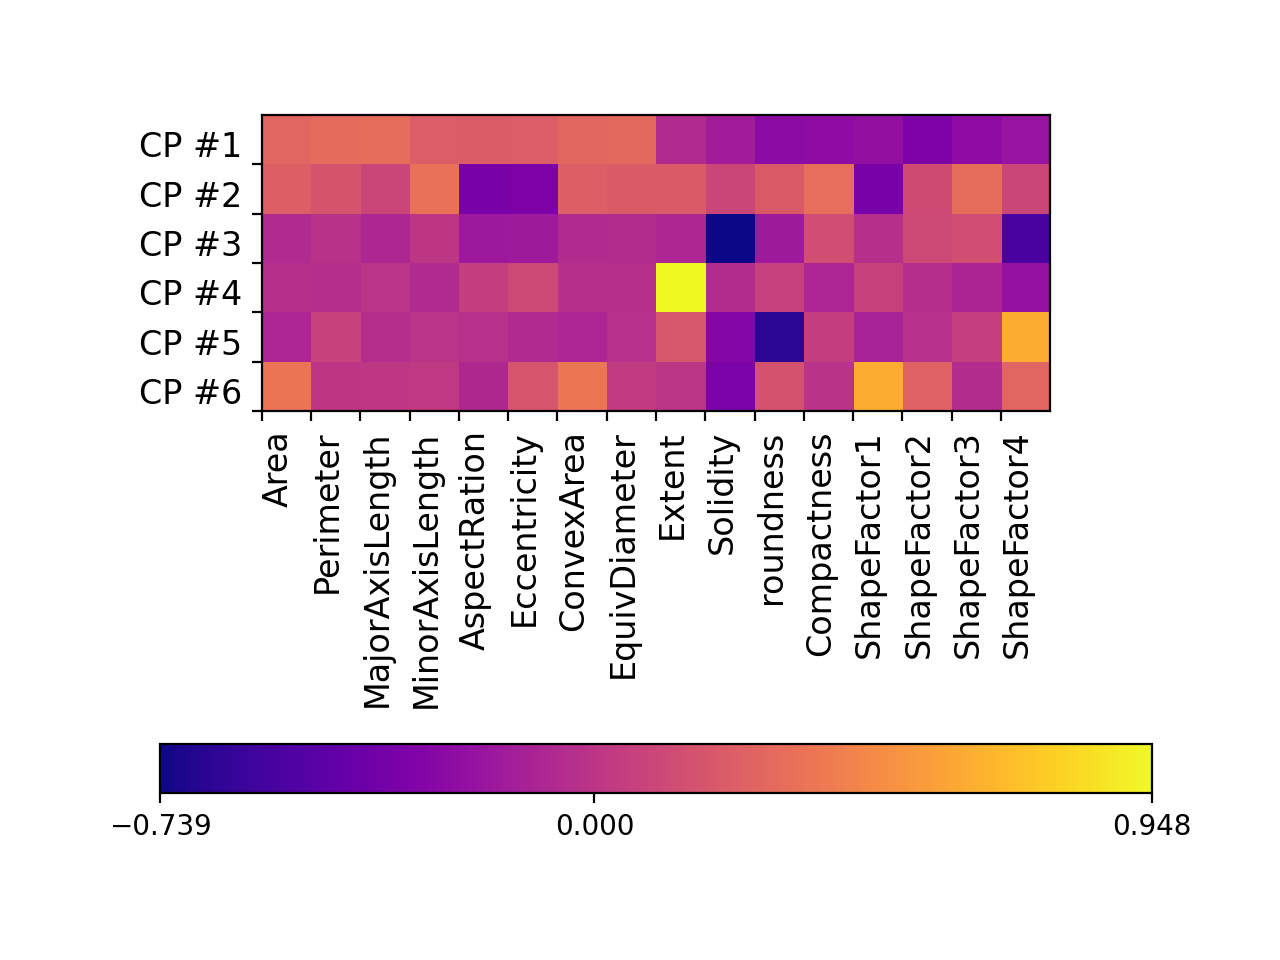

In [198]:
fig = plt.figure()
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(df.columns[:-2])

plt.gca().set_xticks(np.arange(-.5, len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 6));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['CP #1', 'CP #2', 'CP #3', 'CP #4', 'CP #5', 'CP #6'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.45);

# Pendiente analizar esto

In [31]:
pca1 = PCA(n_components = 6).fit(X_normalized)
X_pca = pca1.transform(X_normalized)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state=0)

<IPython.core.display.Javascript object>


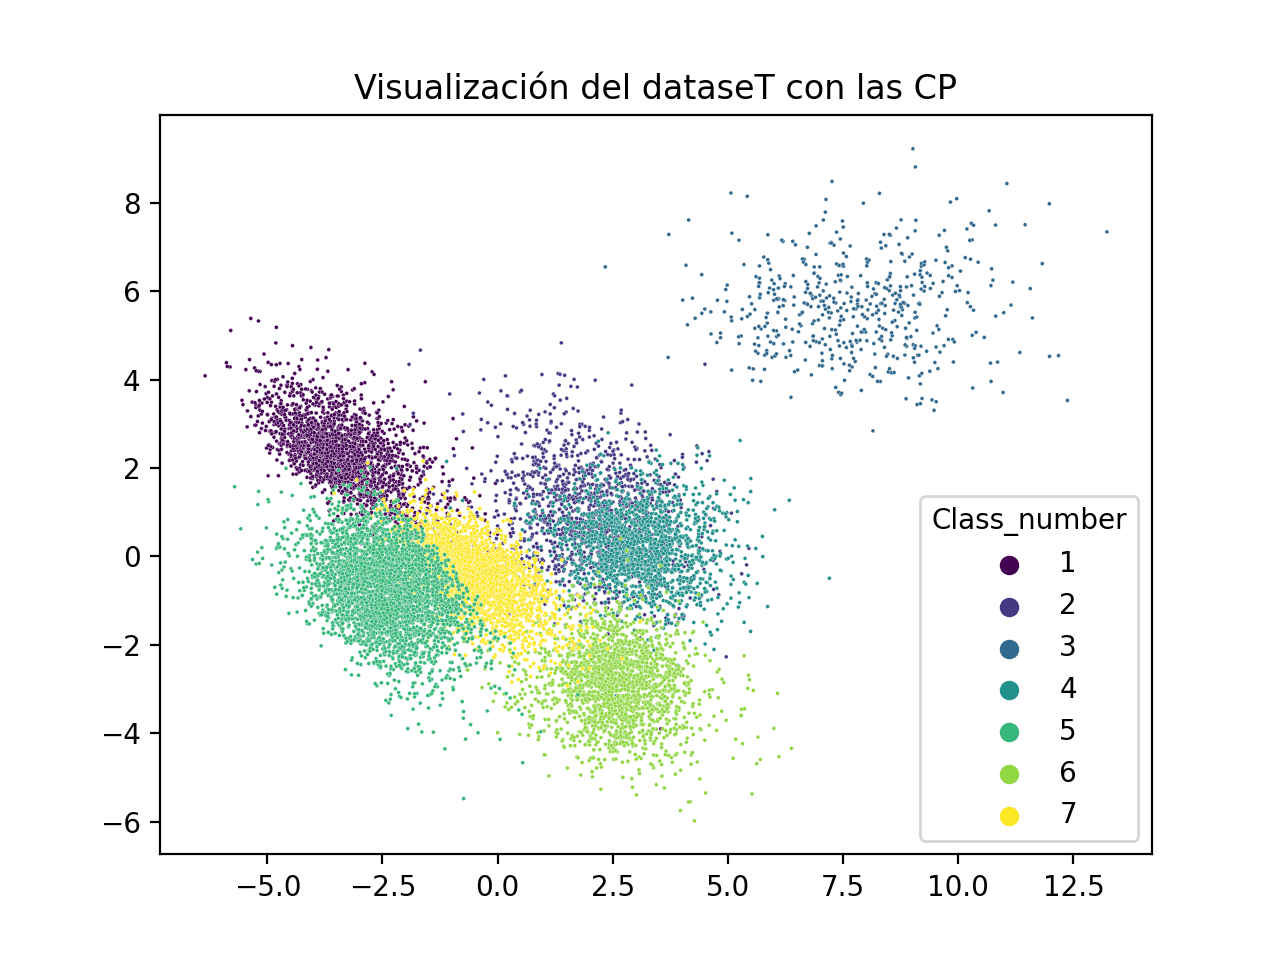

In [388]:
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, s=2, palette='viridis');
plt.title("Visualización del dataseT con las CP");

### Decision tree con PCA

In [32]:
start_time = time()
decision_tree3 = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth = 4).fit(X_train_pca, y_train_pca)
elapsed_time = time() - start_time
print('La exactitud del modelo en el conjunto de entrenamiento es: {:.4f}'
     .format(decision_tree3.score(X_train_pca, y_train_pca)))
print('La exactitud del modelo en el conjunto de prueba es: {:.4f}'
     .format(decision_tree3.score(X_test_pca, y_test_pca)))
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

La exactitud del modelo en el conjunto de entrenamiento es: 0.8512
La exactitud del modelo en el conjunto de prueba es: 0.8542
Tiempo de ejecución: 0.0757 segundos.


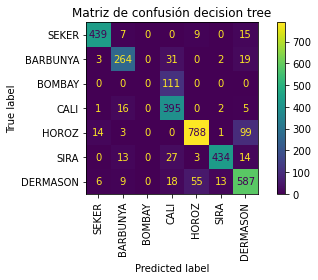

In [35]:
plot_confusion_matrix(decision_tree3,
                      X_test_pca,
                      y_test_pca, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical');
plt.title("Matriz de confusión decision tree")
plt.tight_layout()

## Random forest con PCA

In [37]:
start_time = time()
random_forest.fit(X_train_pca, y_train_pca)
elapsed_time = time() - start_time
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Tiempo de ejecución: 3.0733 segundos.


In [39]:
y_predict_rf_pca = random_forest.predict(X_test_pca)
acc_score_rf_pca = accuracy_score(y_test_pca, y_predict_rf_pca)
print('La exactitud del random forest es: {:.4f}'.format(acc_score_rf_pca))

La exactitud del random forest es: 0.9221


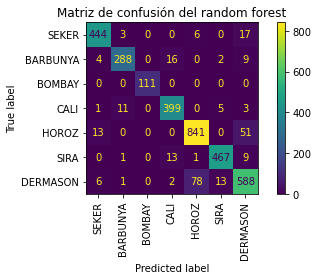

In [41]:
plot_confusion_matrix(random_forest,
                      X_test_pca,
                      y_test_pca, cmap='viridis',
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del random forest")
plt.tight_layout();

## kNN con PCA

In [44]:
knn3 = KNeighborsClassifier(n_neighbors = 9)
start_time = time()
knn3.fit(X_train_pca, y_train_pca)
elapsed_time = time() - start_time
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Tiempo de ejecución: 0.0117 segundos.


In [45]:
acc_score_knn_pca = knn3.score(X_test_pca, y_test_pca)
print('La exactitud del kNN es: {:.4f}'.format(acc_score_knn_pca))

La exactitud del kNN es: 0.9248


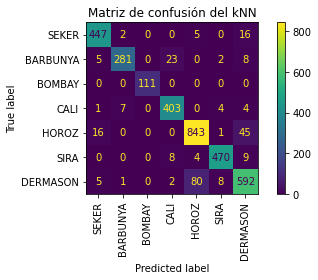

In [46]:
plot_confusion_matrix(knn3,
                      X_test_pca,
                      y_test_pca,
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del kNN")
plt.tight_layout();

## SVM con PCA

In [47]:
from sklearn.svm import SVC
start_time = time()
svm_lpca = SVC(kernel = 'linear').fit(X_train_pca, y_train_pca)
elapsed_time = time() - start_time

print('Accuracy of SVC on training set: {:.4f}'
     .format(svm_lpca.score(X_train_pca, y_train_pca)))
print('Accuracy of  SVC on test set: {:.4f}'
     .format(svm_lpca.score(X_test_pca, y_test_pca)))
print("Tiempo de ejecución: %.4f segundos." % elapsed_time)

Accuracy of SVC on training set: 0.9244
Accuracy of  SVC on test set: 0.9262
Tiempo de ejecución: 0.6345 segundos.


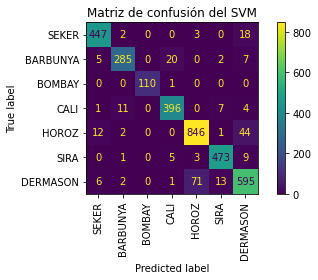

In [48]:
plot_confusion_matrix(svm_lpca,
                      X_test_pca,
                      y_test_pca,
                     display_labels=df['Class'].unique(),
                     xticks_rotation='vertical')
plt.title("Matriz de confusión del SVM")
plt.tight_layout();

Se evidenció que usando Análisis de Componentes Principales (PCA) la evaluación de los modelos fue similar en la exactitud y matriz de confusión, excepto del Decision tree que obtuvo un leve incremento (de 83% a 85%). En costo computacional los modelos ejecutados con PCA tuvieron una disminución en aproximadamente el 50% del tiempo de ejecución.

Se concluye que el PCA es una técnica que puede implementarse para estos modelos.

## Cross-validation


In [58]:
from sklearn.model_selection import StratifiedKFold
cv= StratifiedKFold(n_splits=5, shuffle=True)
cv
# como los datos estan ordenados se requiere estratificar el cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# accuracy is the default scoring metric
acc_cv_dt = cross_val_score(decision_tree2, X, y, cv=cv, scoring='accuracy')
print('Cross-validation (accuracy)', acc_cv_dt.mean())

Cross-validation (accuracy) 0.8237448809404635


In [60]:
acc_cv_rf = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')
print('Cross-validation (accuracy)', acc_cv_rf.mean())

Cross-validation (accuracy) 0.9218276671659467


Se utilizó Cross-Validation para evaluar los resultados de los modelos y garantizar la partición de los datos independientes de entrenamiento y prueba. El desempeño de los modelos con esta técnica no tuvo cambios significativos.

## Partición 70/30 entrenamiento/prueba

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

In [54]:
decision_tree4 = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth = 4).fit(X_train_normalized, y_train)

print('La exactitud del modelo en el conjunto de entrenamiento es: {:.2f}'
     .format(decision_tree4.score(X_train_normalized, y_train)))
print('La exactitud del modelo en el conjunto de prueba es: {:.2f}'
     .format(decision_tree4.score(X_test_normalized, y_test)))

La exactitud del modelo en el conjunto de entrenamiento es: 0.83
La exactitud del modelo en el conjunto de prueba es: 0.82


In [55]:
random_forest3 = RandomForestClassifier()
random_forest3.fit(X_train_normalized, y_train)

RandomForestClassifier()

In [56]:
from sklearn.metrics import accuracy_score
y_predict_rf3 = random_forest3.predict(X_test_normalized)
acc_score_rf3 = accuracy_score(y_test, y_predict_rf3)
acc_score_rf3

0.9233594515181195

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn4 = KNeighborsClassifier(n_neighbors = 9)
knn4.fit(X_train_normalized, y_train)

KNeighborsClassifier(n_neighbors=9)

In [59]:
acc_score_knn4 = knn4.score(X_test_normalized, y_test)
acc_score_knn4

0.9260528893241919

In [60]:
from sklearn.svm import SVC
svm_l3 = SVC(kernel = 'linear').fit(X_train_normalized, y_train)

print('Accuracy of SVC on training set: {:.2f}'
     .format(svm_l3.score(X_train_normalized, y_train)))
print('Accuracy of  SVC on test set: {:.2f}'
     .format(svm_l3.score(X_test_normalized, y_test)))

Accuracy of SVC on training set: 0.93
Accuracy of  SVC on test set: 0.92


Utilizado la partición de entrenamiento y prueba 75/25 se obtuvieron métricas de precisión iguales tanto para el conjunto de entrenamiento como para el de prueba. Se utilizó una proporción diferente de entrenamiento y prueba (70/30) para evaluar si con este cambio se obtienen métricas de desempeño diferentes a las iniciales, sin embargo, las métrias fueron similares, por lo que se concluye que el cambio en la proporción de entrenamiento y prueba no afecta el desempeño de los modelos.

# Conclusión:

Se realizaron 4 modelos de aprendizaje automático para clasificación multiclase de granos de fríjol: decision tree, random forest, k-nearest neighbors y support vector machine. Después de evaluar las métricas de desempeño, el tiempo de ejecución y la matriz de confusión de cada uno, se puede concluir que el decision tree es el modelo que obtuvo el menor desempeño y que obtuvo la menor precisión en el clasificador. Los modelos random forest, kNN y SVM tienen desempeño similar pero diferente costo computacional, siendo en orden descendente random forest el de mayor costo (3.0733 segundos), SVM (0.6345 segundos) y kNN (0.0117 segundos).

Para clasificar los granos de fríjol el modelo óptimo es kNN con parámetro k_neighbors = 9.